In [6]:

from shapely import geometry as geo
from shapely.geometry import Polygon, mapping
import numpy as np
from shapely.geometry import Polygon, MultiPoint
# from shapely.geometry import MultiPoints

from math import ceil
import matplotlib.pyplot as plt
map=np.loadtxt("../../../map/picking_list_star_center.txt",delimiter=',')
map=map[:,0:2]
# map


In [62]:
# insidebox=Polygon([[6.594337463379,12.945747375488],[-34.366767883301,35.874649047852]])

circ = geo.Point(6.594337463379,12.945747375488).buffer(10)
p = Polygon(map)
xmin, ymin, xmax, ymax = p.bounds  # -4.85674599573635, 37.174925051829, -4.85258684662671, 37.1842384372115
# step，5=0.2m
n = 3
x = np.arange(np.floor(xmin * n) / n, np.ceil(xmax * n) / n, 1 / n)  
y = np.arange(np.floor(ymin * n) / n, np.ceil(ymax * n) / n, 1 / n)  

1
(1702, 2)


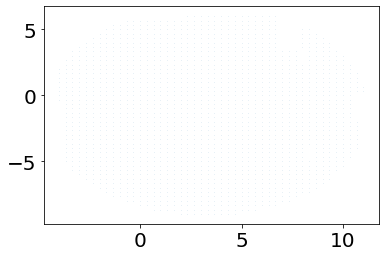

In [75]:
GT=np.loadtxt("/home/xiefujing/research/area_graph/ws/GT/GTliosam.txt",delimiter='\t')
map=np.loadtxt("/home/xiefujing/research/area_graph/ws/map/picking_list_star_center.txt",delimiter=',')
step = 3

where_res=np.where(GT==1668424075.71)
gt_center=[GT[where_res[0][0],1],GT[where_res[0][0],2]]
# geo.Point gt
map_poly = Polygon(map)
print(1)

circ = geo.Point(gt_center).buffer(8)

xmin, ymin, xmax, ymax = map_poly.bounds  # -4.85674599573635, 37.174925051829, -4.85258684662671, 37.1842384372115
x = np.arange(np.floor(xmin * step) / step, np.ceil(xmax * step) / step, 1 / step)  
y = np.arange(np.floor(ymin * step) / step, np.ceil(ymax * step) / step, 1 / step)  
points = MultiPoint(np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]))
# print(map_poly)


result = points.intersection(map_poly)
result=result.intersection(circ)
    
result_list=np.array( [np.array((resu.x, resu.y)) for resu in np.array(result.geoms) ] )
print(result_list.shape)
plt.scatter(result_list[:,0],result_list[:,1],alpha=1,linewidths=0.1,s=0.05)
plt.show()


In [66]:
print(gt_center)

[8.65, 15.95]


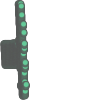

In [67]:
result

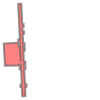

In [50]:
p


In [63]:
points = MultiPoint(np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]))
result = points.intersection(p)
result=result.intersection(circ)
# print(np.array(result.geoms)[:])
result_list=np.array( [np.array((resu.x, resu.y)) for resu in np.array(result.geoms) ] )
print(result_list.shape)

(653, 2)


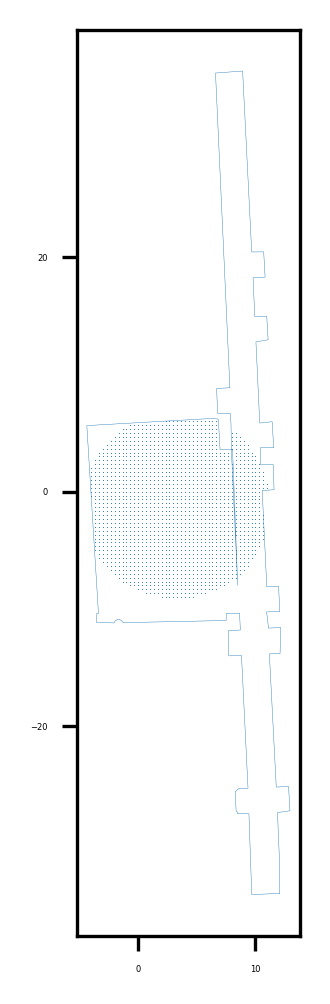

In [76]:
plt.figure(dpi=300)
ax = plt.gca()

ax.set_aspect(1)
linex=map[:,0]
linex=np.append(linex,map[0,0])
# linex.append(map[0,0])
liney=map[:,1]
liney=np.append(liney,map[0,1])
plt.rcParams.update({"font.size":20})#此处必须添加此句代码方可改变标题字体大小
plt.xticks(fontsize=2)
plt.yticks(fontsize=2)

# liney.append(map[0,1])
plt.scatter(result_list[:,0],result_list[:,1],alpha=1,linewidths=0.00000001,s=0.05)
# plt.scatter([6.594337463379,12.945747375488],[-34.366767883301,35.874649047852])
plt.plot(linex,liney,linewidth=0.1)
# plt.plot(np.array(triangle_a.exterior.coords[:])[:,0],np.array(triangle_a.exterior.coords[:])[:,1],linewidth=0.1)

# print(np.array(result).shape)

In [115]:
print(np.array(triangle_a.exterior.coords[:]))

[[  5.00648499  53.17510796]
 [  8.47438526  53.43500328]
 [  9.63696766  30.28824902]
 [ 11.17022419  30.30104065]
 [ 11.34945011  27.06181335]
 [  9.81145287  26.9909687 ]
 [ 10.02665329  22.03937054]
 [ 11.55821466  22.0746913 ]
 [ 11.7368927   19.05529213]
 [ 10.17671251  18.78827286]
 [ 10.66555405   8.40012383]
 [ 12.25201702   8.57417917]
 [ 12.44948769   5.23612714]
 [ 10.75771332   5.24985504]
 [ 10.78675556   3.05121469]
 [ 12.3932457    3.09255397]
 [ 12.49796772  -0.12702353]
 [ 10.97815084  -0.23130623]
 [ 11.5647006  -12.53372574]
 [ 13.07811737 -12.48251915]
 [ 13.22588348 -15.71086311]
 [ 11.54277802 -15.76041889]
 [ 11.78892612 -17.82773972]
 [ 13.34789896 -17.75632858]
 [ 13.26478052 -21.07979441]
 [ 11.89532614 -21.13254309]
 [ 12.77965975 -38.17061424]
 [ 14.35098648 -38.08716679]
 [ 14.53359985 -41.19652367]
 [ 12.9442358  -41.4264183 ]
 [ 13.22624969 -51.76111412]
 [  9.64370108 -51.92712212]
 [  9.2825985  -41.59428596]
 [  7.78713322 -41.54918766]
 [  7.93565893

In [107]:
print(np.array(p).shape)

()


In [110]:
print(triangle_a[0])

TypeError: 'Polygon' object does not support indexing

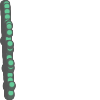

In [28]:
result

In [108]:
from shapely import affinity

triangle_a = affinity.scale(p, xfact=1.5, yfact=1.5)

In [84]:
from shapely.geometry import Polygon, Point, LinearRing
import cv2
import numpy as np
xx = [(10, 10), (12,100), (100, 100), (20,20), (20,10)]
poly = Polygon(xx)
a = poly.buffer(-31)
print(len(list(a.exterior.coords)))
img = np.zeros((200,200,3), dtype=np.uint8)
lines = list(a.exterior.coords)
for i in range(len(lines)-1):
    cv2.line(img, (int(lines[i][0]),int(lines[i][1])), (int(lines[i+1][0]),int(lines[i+1][1])),(255,255,0),1, cv2.LINE_AA)
for i in range(len(xx)-1):
    cv2.line(img, xx[i],xx[i+1],(255,255,255),1, cv2.LINE_AA)

cv2.imshow('ss',img)
cv2.waitKey()
exit()


0


error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/highgui/src/window.cpp:632: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


(12178, 2)


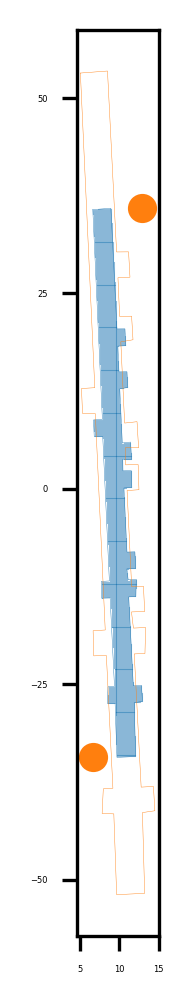

In [117]:
# ax.set_aspect(1)


In [82]:
np.savetxt("/home/xiefujing/research/area_graph/ws/initialization/corridorx.txt", np.array(result)[:,0],fmt='%f')
np.savetxt("/home/xiefujing/research/area_graph/ws/initialization/corridory.txt", np.array(result)[:,1],fmt='%f')


<AxesSubplot:>

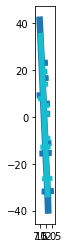

In [2]:
import geopandas as gpd
from shapely import Polygon
from shapely import affinity

vertices = [(0, 0), (1, 1), (2, 0.5), (2.5, 2), (0.5, 2.5)]

# Create the polygon
polygon = Polygon(map)

scaled_polygon = affinity.scale(polygon, xfact=1.2, yfact=1.2)
gdf = gpd.GeoDataFrame({'geometry': [scaled_polygon, polygon]})
gdf.plot(column='geometry')

<AxesSubplot:>

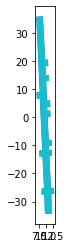

In [5]:
buffered_polygon = polygon.buffer(0.04, join_style=2)
gdf = gpd.GeoDataFrame({'geometry': [buffered_polygon, polygon]})
gdf.plot(column='geometry')

In [6]:
print(np.array(np.array(gdf.to_numpy())[0][0].exterior.coords[:]))
np.savetxt("../../../map/corridor_enlarge.txt",np.array(np.array(gdf.to_numpy())[0][0].exterior.coords[:]),delimiter=',')

[[  6.55260492  35.7383701 ]
 [  8.94416407  35.91760105]
 [  9.71935127  20.48379817]
 [ 10.74132738  20.4923243 ]
 [ 10.86515013  18.25442246]
 [  9.83934395  18.20717082]
 [  9.97937685  14.98512022]
 [ 10.99980815  15.00865333]
 [ 11.12332157  12.92145598]
 [ 10.08277457  12.74337007]
 [ 10.40500488   5.89580022]
 [ 11.46213855   6.01178134]
 [ 11.59879595   3.70171912]
 [ 10.4690259    3.71088664]
 [ 10.48731272   2.32648535]
 [ 11.55753188   2.35402494]
 [ 11.62989254   0.12936636]
 [ 10.61726825   0.05988483]
 [ 11.00455703  -8.06319244]
 [ 12.01357661  -8.02905218]
 [ 12.11575364 -10.26138132]
 [ 10.99675603 -10.29432804]
 [ 11.15128714 -11.59218635]
 [ 12.19634109 -11.54431606]
 [ 12.13891682 -13.84040832]
 [ 11.22894569 -13.87545861]
 [ 11.81432437 -25.15369511]
 [ 12.86160426 -25.09807788]
 [ 12.98783244 -27.24736444]
 [ 11.92712746 -27.40079083]
 [ 12.11523627 -34.29423637]
 [  9.64725227 -34.40859772]
 [  9.40641315 -27.51706257]
 [  8.40623603 -27.48690053]
 [  8.50884722

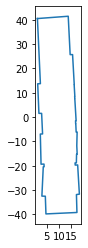

In [44]:
ax = plt.gca()

ax.set_aspect(1)
plt.plot(np.array(np.array(gdf.to_numpy())[0][0].exterior.coords[:])[:,0],
         np.array(np.array(gdf.to_numpy())[0][0].exterior.coords[:])[:,1])
# plt.plot(np.array(np.array(gdf.to_numpy())[1][0].exterior.coords[:])[:,0],
#          np.array(np.array(gdf.to_numpy())[1][0].exterior.coords[:])[:,1])


In [36]:
print(np.array(np.array(gdf.to_numpy())[1][0].exterior.coords[:]))


[[  6.59433746  35.7013855 ]
 [  8.90627098  35.87464905]
 [  9.68132591  20.44347954]
 [ 10.70349693  20.45200729]
 [ 10.82298088  18.29252243]
 [  9.79764938  18.24529266]
 [  9.94111633  14.94422722]
 [ 10.96215725  14.96777439]
 [ 11.08127594  12.95484161]
 [ 10.04115582  12.77682877]
 [ 10.36705017   5.85139608]
 [ 11.42469215   5.96743298]
 [ 11.55633926   3.74206495]
 [ 10.42848969   3.75121689]
 [ 10.44785118   2.28545666]
 [ 11.5188446    2.31301618]
 [ 11.58865929   0.16663118]
 [ 10.57544804   0.09710938]
 [ 10.96648121  -8.10450363]
 [ 11.97542572  -8.07036591]
 [ 12.07393646 -10.22259521]
 [ 10.95186615 -10.2556324 ]
 [ 11.11596489 -11.63384628]
 [ 12.15528011 -11.58623886]
 [ 12.09986782 -13.80188274]
 [ 11.18689823 -13.83704853]
 [ 11.77645397 -25.19576263]
 [ 12.82400513 -25.140131  ]
 [ 12.94574738 -27.21303558]
 [ 11.88617134 -27.36629868]
 [ 12.0741806  -34.25609589]
 [  9.68581486 -34.36676788]
 [  9.4450798  -27.47821045]
 [  8.44810295 -27.44814491]
 [  8.54712009